In [1]:
from pandas import DataFrame
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/CMPE-252

Mounted at /content/drive
/content/drive/Shareddrives/CMPE-252


In [3]:
## LAYOUT OF THE GRID

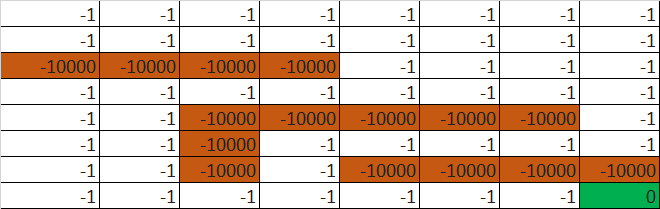

In [4]:
import numpy as np


GAMMA = 0.9         
NOISE = 0.2 


#Define all states
all_states=[]
for i in range(8):
    for j in range(8):
            all_states.append((i,j))

#Define rewards for all states
rewards = {}
for i in all_states:
    if (i == (2,0) or i == (2,1) or i ==  (2,2)or i == (2,3)or i == (2,4)
   or i == (4,2)or i == (4,3)or i == (4,4)or i == (4,5)or i == (4,6)
        or i == (5,2) or i == (6,2)  or i == (6,4) 
    or i == (6,5) or i == (6,6) or i == (6,7)):
        rewards[i] = -10000
    elif i == (7,7):
        rewards[i] = 0
    else:
        rewards[i] = -1

# rewards

In [5]:
size = 8
def possible_actions(grid, no):
    i , j = grid[no]
    
    actions = dict()

    if (j-1) >=0: actions['L'] = (grid[no -1],  rewards.get(grid[no-1]))
    else: actions['L'] = (grid[no], rewards.get(grid[no]))
    


    if (i-1) >=0: actions['U'] = (grid[no - 8],  rewards.get(grid[no-8]))
    else: actions['U'] = (grid[no],  rewards.get(grid[no]))

    if (j+1) < size: actions['R'] = (grid[no + 1],  rewards.get(grid[no+1]))
    else: actions['R'] = (grid[no],  rewards.get(grid[no]))

    if (i+1) < size: actions['D'] = (grid[no + 8],  rewards.get(grid[no+8]))
    else: actions['D'] = (grid[no],  rewards.get(grid[no]))


    return actions

In [6]:
possible_actions(all_states, 4)

{'D': ((1, 4), -1), 'L': ((0, 3), -1), 'R': ((0, 5), -1), 'U': ((0, 4), -1)}

In [7]:
actions = {} # not for walls or goal state, only for working nodes.

for i in all_states:
  if rewards[i] == -1:
    actions[i] = ('D', 'R', 'L', 'U')

In [8]:
#Define an initial policy
policy={}# not for walls or goal state, only for working nodes.
for s in actions.keys():
    policy[s] = np.random.choice(actions[s])

In [9]:
#Define initial value function 
V={} # for all nodes
for s in all_states:
    V[s] = rewards[s]

In [10]:
SMALL_ENOUGH = 0.0000001
all_actions_information = []
delta = []
iteration = 0
for i in range(1000):

  biggest_change = 0
  for index, s in enumerate(all_states):
    if s in policy:
      old_v = V[s]
      new_v = 0
      all_rewards = []
      
      all_actions_information = possible_actions(all_states, index)
      for a in actions[s]:
        nxt = all_actions_information.get(a)[0]
 


        nxt = tuple(nxt)
                      
        v = rewards[s] + (GAMMA * V[nxt])
        
        all_rewards.append((v, a))
        # if v > new_v:
        #   new_v = v
        #   policy[s] = a
        
      new_v = max(all_rewards)
      V[s] = new_v[0]
      policy[s] = new_v[1]
      biggest_change = max(biggest_change, np.abs(old_v - V[s]))
   
      delta.append(biggest_change)

In [11]:
df = pd.DataFrame(delta, columns=['accumulated_rewards'])
df.to_csv('vi_delta.csv',index=False)
# from google.colab import files
# files.download('vi_delta.csv')

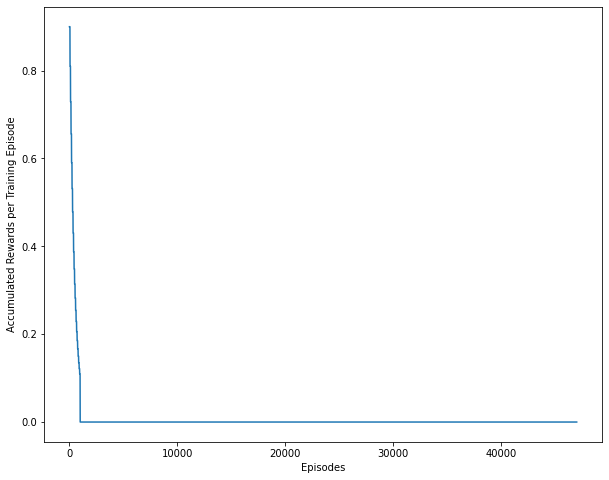

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(delta)
ax.set(xlabel='Episodes', ylabel='Accumulated Rewards per Training Episode')
plt.show() 

In [13]:
def print_values(V):
  for i in range(8):
    print("----------------------------------------")
    for j in range(8):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")

def print_policy(P):
  for i in range(8):
    print("----------------------------------------")
    for j in range(8):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")  
    print("")

In [14]:
print_values(V)
print("************************************************************************************************")
print("************************************************************************************************")
print_policy(policy)

----------------------------------------
-9.02|-8.91|-8.78|-8.65|-8.50|-8.33|-8.15|-7.94|
----------------------------------------
-8.91|-8.78|-8.65|-8.50|-8.33|-8.15|-7.94|-7.71|
----------------------------------------
-10000.00|-10000.00|-10000.00|-10000.00|-10000.00|-7.94|-7.71|-7.46|
----------------------------------------
-6.86|-6.51|-6.86|-7.18|-7.46|-7.71|-7.46|-7.18|
----------------------------------------
-6.51|-6.13|-10000.00|-10000.00|-10000.00|-10000.00|-10000.00|-6.86|
----------------------------------------
-6.13|-5.70|-10000.00|-4.69|-5.22|-5.70|-6.13|-6.51|
----------------------------------------
-5.70|-5.22|-10000.00|-4.10|-10000.00|-10000.00|-10000.00|-10000.00|
----------------------------------------
-5.22|-4.69|-4.10|-3.44|-2.71|-1.90|-1.00| 0.00|
************************************************************************************************
************************************************************************************************
----------------------

In [15]:

V[(7,7)] = 0


blocked_cells = [(2,0),(2,1) ,(2,2),(2,3),(2,4),(4,2),(4,3),(4,4),(4,5),(4,6) ,(5,2),(6,2) ,(6,4) ,(6,5),(6,6),(6,7)]

nrows, ncols = (8,8)

terminal_states = [(7,7)]
free_cells = [cell for cell, rewards in rewards.items() if(  cell not in (terminal_states and blocked_cells))]


def visualize_path(state_values, visited, policy):
    # def optimal_path_():
    path = np.empty(shape=(nrows, ncols))

    for i in range(nrows):
        for j in range(ncols):
            if (i,j) in visited:
                path[(i,j)] = 1
            elif (i,j) in blocked_cells:
                path[(i,j)] = -1
            else:
                path[(i,j)] = 0

    fig, axs = plt.subplots(figsize=(10,8))
    axs = sns.heatmap(path, cmap="YlGnBu", linewidths=.5, ax=axs)
    plt.show()


def visualize_values(V, policy):

    node_x = [0]*8
    node_y = [0]*8
    policy_2d = [[ ' ' for i in range(8) ] for j in range(8)]
    V_2d = [[ ' ' for i in range(8) ] for j in range(8)]
    for x in range(0,8,1):
            node_x[x] = x
            node_y[x] = x
            for y in range(0,8,1):
    #             value_2d[x][y] = df_value[(8*x)+y]   
                if (x,y) in blocked_cells:
                        policy_2d[x][y] = 'Wall'
                        V_2d[x][y] = -10000
                elif (x, y) in terminal_states:
                        policy_2d[x][y] = 'Goal'
                        V_2d[x][y] = 0
                else:
                      policy_2d[x][y] = policy[(x, y)]
                      V_2d[x][y] = V[(x, y)]
                  
    plot_direction_df = DataFrame(V_2d, index=node_x, columns=node_y)
    fig, ax1 = plt.subplots(figsize=(15,10))
    ax1 = sns.heatmap(plot_direction_df, annot=policy_2d, fmt="", cmap = "YlGnBu")
    plt.show()
    
    fig, ax2 = plt.subplots(figsize=(15,10))
    ax2 = sns.heatmap(plot_direction_df, annot=True, fmt=".4f", cmap = "YlGnBu")
    plt.show()


def visualize(state_values, policy):

    visited = [(0,0)]
    for curr_cell_ in visited:
        i, j = curr_cell_ 
        temp = {}
        if ((i+1,j) in free_cells or (i+1,j) in terminal_states) and (i+1,j) not in visited: 
            temp[(i+1, j)] = state_values[(i+1,j)]

        if ((i-1,j) in free_cells or (i-1,j) in terminal_states) and (i-1,j) not in visited:
            temp[(i-1, j)] = state_values[(i-1,j)]

        if ((i,j+1) in free_cells or (i,j+1) in terminal_states) and (i,j+1) not in visited:
            temp[(i, j+1)] = state_values[(i,j+1)]

        if ((i,j-1) in free_cells or (i,j-1) in terminal_states) and (i,j-1) not in visited:
            temp[(i, j-1)] = state_values[(i,j-1)]

        temp_max = max(list(temp.values()))

        for x,y in temp.items():
            if y == temp_max:     next_cell_ = x

        visited.append(next_cell_)
        if next_cell_ == (7, 7) : break    

    visualize_path(state_values, visited, policy)
    visualize_values(state_values, policy)

#     return visited

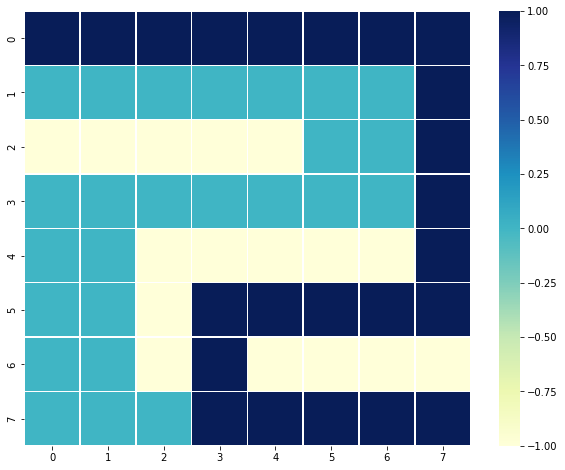

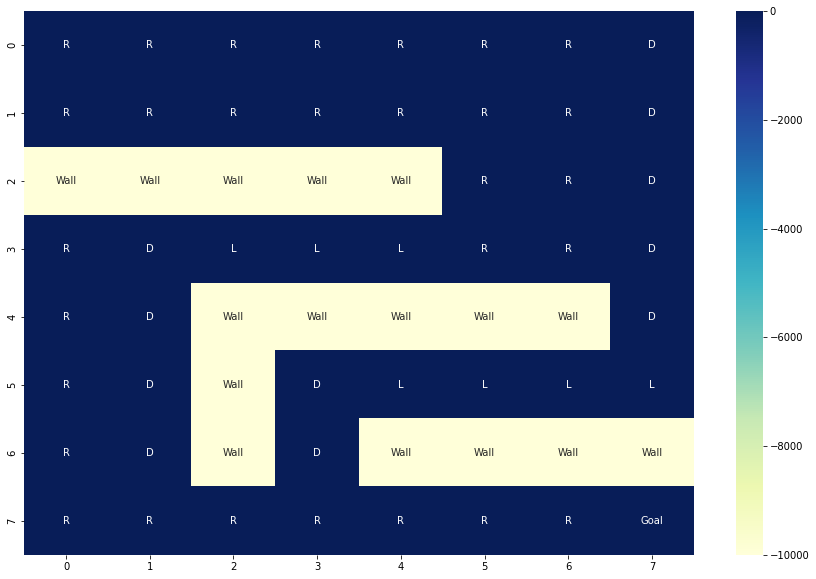

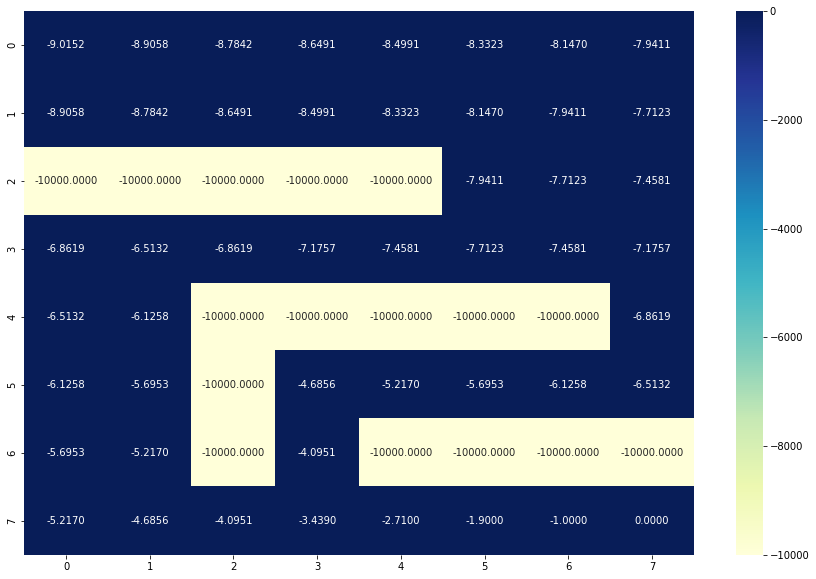

In [16]:
visualize(V, policy)